In [25]:
import pandas as pd

In [26]:
import pandas as pd
import re

# Replace 'your_file.txt' with the actual path to your txt file
file_path = 'Browsing History.txt'

# Read the txt file into a Pandas DataFrame using read_table with '\n\n' as the separator
with open(file_path, 'r') as file:
    file_content = file.read()

# Split the content into entries based on empty lines
entries = file_content.split('\n\n')

# Extract Date and Link from each entry
data = {'Date': [], 'Link': []}
for entry in entries:
    lines = entry.split('\n')
    for line in lines:
        if line.startswith('Date:'):
            data['Date'].append(line.split('Date: ')[1])
        elif line.startswith('Link:'):
            data['Link'].append(line.split('Link: ')[1])

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Display the DataFrame
df.shape

(73005, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73005 entries, 0 to 73004
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    73005 non-null  datetime64[ns]
 1   Link    73005 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.1+ MB


/var/folders/xl/_rkvx_j95jsfcl457nd22_kr0000gn/T/ipykernel_3370/1165085453.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Count', data=monthly_counts, palette='viridis')


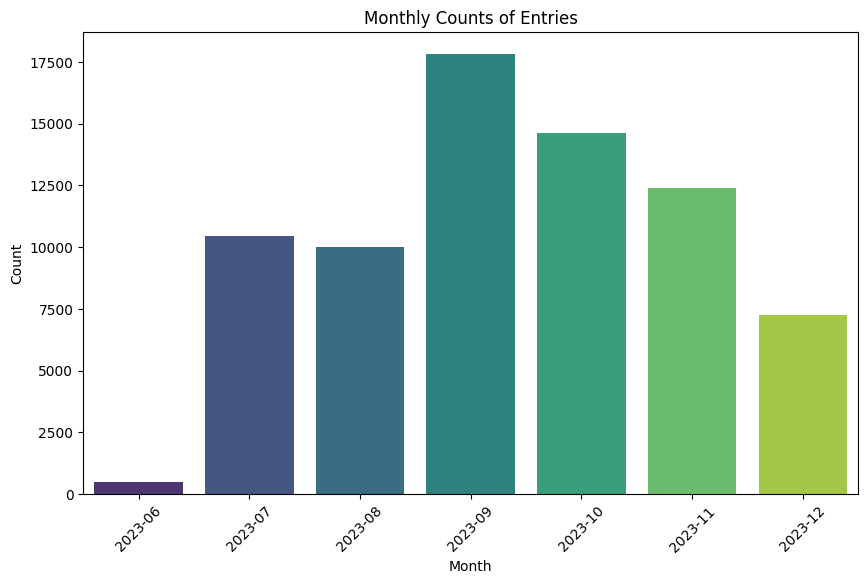

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# If not, replace df with the actual name of your DataFrame

# Group by month and count the occurrences
monthly_counts = df.groupby(df['Date'].dt.to_period("M")).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Count', data=monthly_counts, palette='viridis')
plt.title('Monthly Counts of Entries')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


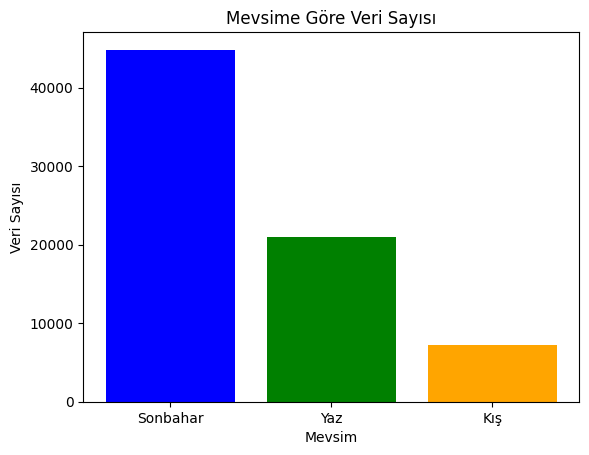

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Varsayılan olarak df'nin tarih sütununun bir datetime nesnesi olduğunu varsayalım
df['Mevsim'] = df['Date'].dt.month.map({1: 'Kış', 2: 'Kış', 3: 'İlkbahar', 4: 'İlkbahar', 5: 'İlkbahar', 6: 'Yaz',
                                       7: 'Yaz', 8: 'Yaz', 9: 'Sonbahar', 10: 'Sonbahar', 11: 'Sonbahar', 12: 'Kış'})

# Gruplayarak her bir kategori için sayıları alalım
mevsim_counts = df['Mevsim'].value_counts()

# Bar chart oluşturalım
plt.bar(mevsim_counts.index, mevsim_counts, color=['blue', 'green', 'orange', 'red'])
plt.title('Mevsime Göre Veri Sayısı')
plt.xlabel('Mevsim')
plt.ylabel('Veri Sayısı')
plt.show()






In [52]:
import pandas as pd

file_path = 'Login History.txt'

# Read the txt file into a Pandas DataFrame using read_table with '\n\n' as the separator
with open(file_path, 'r') as file:
    file_content = file.read()

# Split the content into entries based on empty lines
entries = file_content.split('\n\n')

# Extract Date, Device Model, and Network Type from each entry
data = {'Date': [], 'Device Model': [], 'Network Type': []}
for entry in entries:
    lines = entry.split('\n')
    for line in lines:
        if line.startswith('Date:'):
            date_str = line.split('Date: ')[1].replace(' UTC', '')  # Remove 'UTC' suffix
            data['Date'].append(date_str)
        elif line.startswith('Device Model:'):
            data['Device Model'].append(line.split('Device Model: ')[1])
        elif line.startswith('Network Type:'):
            data['Network Type'].append(line.split('Network Type: ')[1])

# Create a DataFrame from the extracted data
df2 = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Display the DataFrame
print(df2.head())


                 Date Device Model Network Type
0 2023-12-25 20:55:36   iPhone12,1        Wi-Fi
1 2023-12-25 20:55:36   iPhone12,1        Wi-Fi
2 2023-12-25 19:17:50   iPhone12,1        Wi-Fi
3 2023-12-25 19:10:04   iPhone12,1        Wi-Fi
4 2023-12-25 19:07:59   iPhone12,1        Wi-Fi


In [53]:

df2['Mevsim'] = df2['Date'].dt.month.map({1: 'Kış', 2: 'Kış', 3: 'İlkbahar', 4: 'İlkbahar', 5: 'İlkbahar', 6: 'Yaz',
                                       7: 'Yaz', 8: 'Yaz', 9: 'Sonbahar', 10: 'Sonbahar', 11: 'Sonbahar', 12: 'Kış'})

df2.head()

,Date,Device Model,Network Type,Mevsim
0,2023-12-25 20:55:36,"iPhone12,1",Wi-Fi,Kış
1,2023-12-25 20:55:36,"iPhone12,1",Wi-Fi,Kış
2,2023-12-25 19:17:50,"iPhone12,1",Wi-Fi,Kış
3,2023-12-25 19:10:04,"iPhone12,1",Wi-Fi,Kış
4,2023-12-25 19:07:59,"iPhone12,1",Wi-Fi,Kış


<Axes: xlabel='Mevsim'>

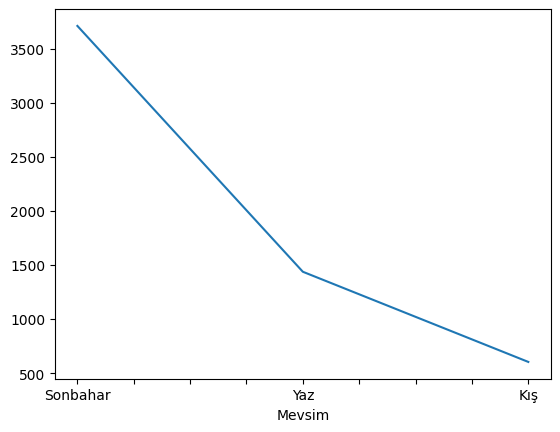

In [55]:
df2.Mevsim.value_counts().plot()

As it expected the login history and watching history are positively correlated to each other which means ı am always spending almost the same time when ı logging in.

<Axes: ylabel='count'>

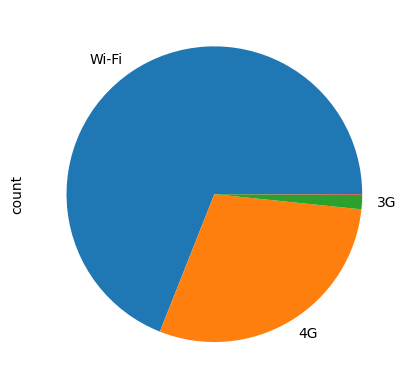

In [60]:
df2["Network Type"].value_counts().plot(kind="pie")

Since I am not living in the campus I am not connected to campus Wi-Fi which means that I am watching Tiktok mostly at home.

<Axes: xlabel='Hour'>

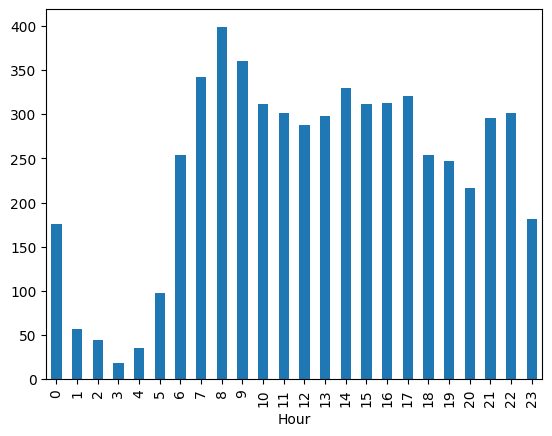

In [69]:
df2['Hour'] = df2['Date'].dt.hour

# Display the updated DataFrame with the 'Hour' column
df2.Hour.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='Hour'>

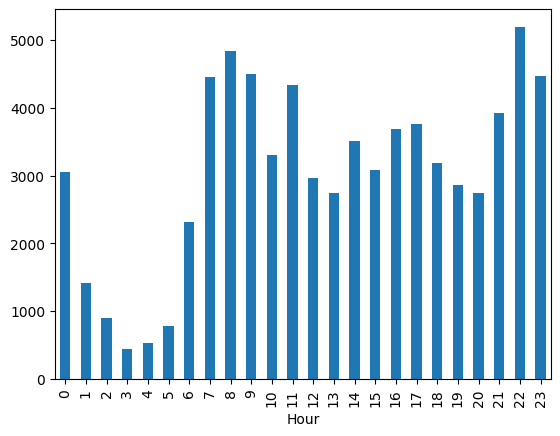

In [70]:
df['Hour'] = df['Date'].dt.hour

# Display the updated DataFrame with the 'Hour' column
df.Hour.value_counts().sort_index().plot(kind="bar")

The first chart is logging history and the second one is watching history. We can also see my sleeping pattern I am mostly sleeping between 1 am and 7 am. Another thing that we can interpret from these charts is every morning I am checking Tiktok. Also, most active time is around 10 pm.

In [71]:
df2['Schedule'] = df2['Date'].dt.month.map({1: 'Exam', 2: 'Holiday', 3: 'School', 4: 'Exam', 5: 'School', 6: 'Exam',
                                       7: 'Holiday', 8: 'Holiday', 9: 'Holiday', 10: 'School', 11: 'Exam', 12: 'School'})
df['Schedule'] = df['Date'].dt.month.map({1: 'Exam', 2: 'Holiday', 3: 'School', 4: 'Exam', 5: 'School', 6: 'Exam',
                                       7: 'Holiday', 8: 'Holiday', 9: 'Holiday', 10: 'School', 11: 'Exam', 12: 'School'})

<Axes: xlabel='Schedule'>

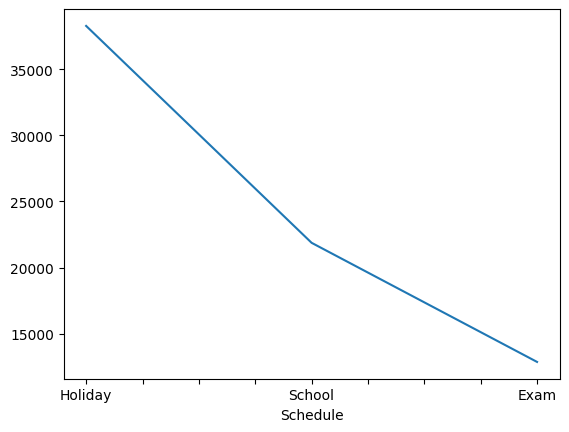

In [74]:
df.Schedule.value_counts().plot()

<Axes: xlabel='Schedule'>

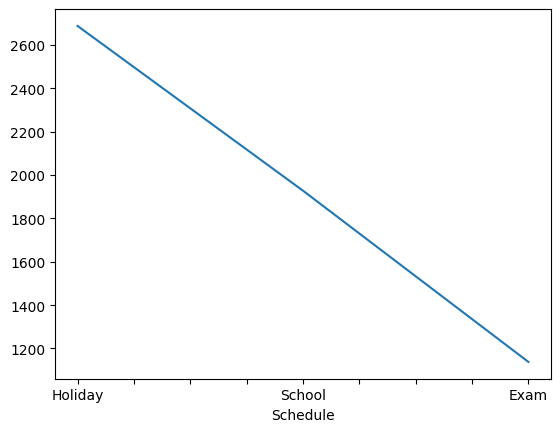

In [75]:
df2.Schedule.value_counts().plot()

The first line is watching history and the second one is logging history. The first line graph shows that the activity decreases from holidays to exam days, and as seen, I have watched TikTok the most on holidays. The second line graph similarly shows that my TikTok login dates decrease towards exam days.

In [77]:
file_path = 'Like List.txt'

# Read the txt file into a Pandas DataFrame using read_table with '\n\n' as the separator
with open(file_path, 'r') as file:
    file_content = file.read()

# Split the content into entries based on empty lines
entries = file_content.split('\n\n')

# Extract Date and Link from each entry
data = {'Date': [], 'Link': []}
for entry in entries:
    lines = entry.split('\n')
    for line in lines:
        if line.startswith('Date:'):
            data['Date'].append(line.split('Date: ')[1])
        elif line.startswith('Link:'):
            data['Link'].append(line.split('Link: ')[1])

# Create a DataFrame from the extracted data
df3 = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Display the DataFrame
df3.head()



,Date,Link
0,2023-12-27 22:28:42,https://www.tiktokv.com/share/video/7317400193...
1,2023-12-27 09:28:22,https://www.tiktokv.com/share/video/7317161616...
2,2023-12-26 14:06:14,https://www.tiktokv.com/share/video/7309877169...
3,2023-12-26 06:16:20,https://www.tiktokv.com/share/video/7316621233...
4,2023-12-25 18:48:38,https://www.tiktokv.com/share/video/7295140558...


In [78]:
df3['Mevsim'] = df3['Date'].dt.month.map({1: 'Kış', 2: 'Kış', 3: 'İlkbahar', 4: 'İlkbahar', 5: 'İlkbahar', 6: 'Yaz',
                                       7: 'Yaz', 8: 'Yaz', 9: 'Sonbahar', 10: 'Sonbahar', 11: 'Sonbahar', 12: 'Kış'})

<Axes: xlabel='Mevsim'>

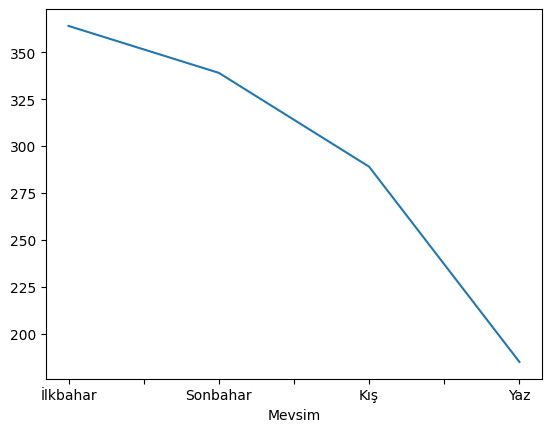

In [80]:
df3.Mevsim.value_counts().plot()

As can be seen in the chart here which is the like history of my tiktok data, even I am watching tiktok mostly on summer I like videos less in summer, we can interpret the results like, Mostly I am more outgoing in summers so, I am less cautios about what I am watching, but in other seasons which I am mostly in school or home, I am more careful about the content I am watching and liking the videos.